In [1]:
#preprae library

import pandas as pd
import numpy as np

In [2]:
Load_Train=pd.read_csv('heatingoil.csv')

In [3]:
Load_Train.head()

,Insulation,Temperature,Heating_Oil,Num_Occupants,Avg_Age,Home_Size
0,6,74,132,4,23.8,4
1,10,43,263,4,56.7,4
2,3,81,145,2,28.0,6
3,9,50,196,4,45.1,3
4,2,80,131,5,20.8,2


In [4]:
Load_Train

,Insulation,Temperature,Heating_Oil,Num_Occupants,Avg_Age,Home_Size
0,6,74,132,4,23.8,4
1,10,43,263,4,56.7,4
2,3,81,145,2,28.0,6
3,9,50,196,4,45.1,3
4,2,80,131,5,20.8,2
...,...,...,...,...,...,...
1213,7,56,264,5,58.2,5
1214,5,78,129,1,22.5,1
1215,5,77,138,3,26.8,1
1216,3,89,156,2,34.0,2


In [5]:
Load_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Insulation     1218 non-null   int64  
 1   Temperature    1218 non-null   int64  
 2   Heating_Oil    1218 non-null   int64  
 3   Num_Occupants  1218 non-null   int64  
 4   Avg_Age        1218 non-null   float64
 5   Home_Size      1218 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 57.2 KB


# Data Preparation

In [19]:
df_train=pd.DataFrame(Load_Train)

In [20]:
df_train

,Insulation,Temperature,Heating_Oil,Num_Occupants,Avg_Age,Home_Size,age
0,6,74,132,4,23.8,4,23
1,10,43,263,4,56.7,4,56
2,3,81,145,2,28.0,6,28
3,9,50,196,4,45.1,3,45
4,2,80,131,5,20.8,2,20
...,...,...,...,...,...,...,...
1213,7,56,264,5,58.2,5,58
1214,5,78,129,1,22.5,1,22
1215,5,77,138,3,26.8,1,26
1216,3,89,156,2,34.0,2,34


In [21]:
age=df_train['Avg_Age'].astype(int)

In [22]:
df_train['age']=age

In [23]:
df_train['age']=df_train['Avg_Age'].astype(int)

In [24]:
df_train

,Insulation,Temperature,Heating_Oil,Num_Occupants,Avg_Age,Home_Size,age
0,6,74,132,4,23.8,4,23
1,10,43,263,4,56.7,4,56
2,3,81,145,2,28.0,6,28
3,9,50,196,4,45.1,3,45
4,2,80,131,5,20.8,2,20
...,...,...,...,...,...,...,...
1213,7,56,264,5,58.2,5,58
1214,5,78,129,1,22.5,1,22
1215,5,77,138,3,26.8,1,26
1216,3,89,156,2,34.0,2,34


In [25]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Insulation     1218 non-null   int64  
 1   Temperature    1218 non-null   int64  
 2   Heating_Oil    1218 non-null   int64  
 3   Num_Occupants  1218 non-null   int64  
 4   Avg_Age        1218 non-null   float64
 5   Home_Size      1218 non-null   int64  
 6   age            1218 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 66.7 KB


In [26]:
df_train=df_train[['Temperature','Insulation','Num_Occupants','age', 'Home_Size', 'Heating_Oil']]

In [27]:
#Prepare Graph for Correlation

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

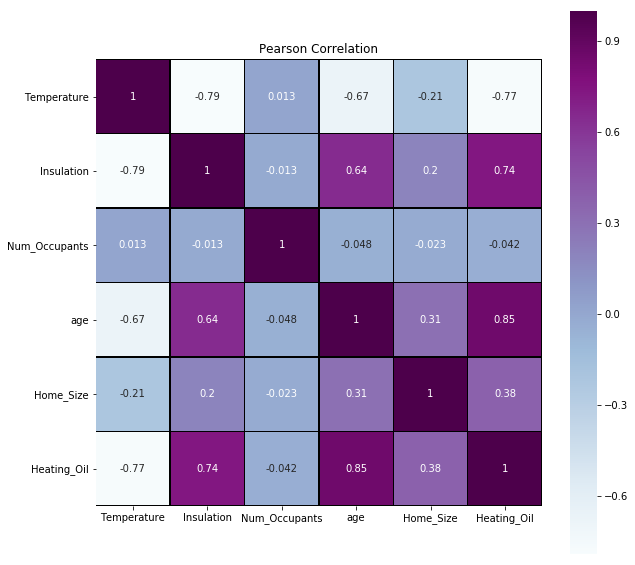

In [28]:
#Setting Figure

f, ax = plt.subplots(figsize=(10, 10))
plt.title('Pearson Correlation')

#Membuat Visualisasi Correlation Pearson
sns.heatmap(df_train.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="BuPu", linecolor='black',  annot=True)

# Data Modeling

In [17]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [40]:
#Input Variabel

X=df_train[['Temperature','Insulation','Num_Occupants','age','Home_Size' ]]

In [41]:
#target variable
Y=df_train['Heating_Oil']

In [42]:
#Spliting Data Training dan Testing

X_train, X_test, Y_train,Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [43]:
#Algoruth Linier Regresi
regressor = LinearRegression() 

#Mentraining data dengan algorithm
regressor.fit(X_train, Y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [44]:
print(regressor.intercept_)

132.76588823016806


In [45]:
print(regressor.coef_)

[-0.8397637   2.89168157 -0.32340788  2.06933699  3.07630658]


In [46]:
Y_pred = regressor.predict(X_test)

In [47]:
Y_pred

array([149.93556571, 128.11616996, 128.54572253, 267.29184842,
       121.56792579, 137.41331796, 133.42443075, 135.11702777,
       263.44217985, 163.41977647, 268.32372708, 254.55676809,
       156.65925756, 131.44366129, 261.69150404, 238.8198281 ,
       208.14725898, 136.59288107, 191.47807173, 127.09221702,
       215.32799511, 271.48401252, 173.31306771, 233.20665326,
       244.66959294, 213.83515845, 156.87711456, 271.65855031,
       162.91732584, 168.21211721, 178.49905485, 278.83136072,
       209.10882221, 131.75840874, 263.94753177, 125.19024395,
       149.01722593, 178.76623194, 273.4698064 , 118.77063317,
       243.48961747, 166.7425211 , 133.87645059, 228.77583341,
       231.29395403, 153.00851639, 232.92032882, 144.08478843,
       173.79655296, 173.30862015, 231.70799518, 245.37432945,
       275.46839219, 196.1120462 , 161.53941398, 173.7423879 ,
       154.37073505, 115.58045279, 178.80140741, 143.8849895 ,
       125.36219654, 239.288118  , 139.93245102, 115.23

In [48]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})

In [49]:
df

,Actual,Predicted
1144,135,149.935566
990,131,128.116170
478,118,128.545723
161,264,267.291848
1153,127,121.567926
...,...,...
996,187,191.874297
528,185,212.238992
825,181,171.118537
483,255,245.682820


In [50]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred)) 

Mean Absolute Error: 16.13078891379998
